In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("top_hits_2007-2020.csv")
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
data=df.drop(columns=["Artist and Title", ""'(x?)'"",'Track','track_id'])

audio_only = data.fillna(0)
audio_only

,Pos,Wks,T10,Pk,PkStreams,Total,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,123,26.0,1,19553820,636825483,0.585,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147,4
1,2,147,30.0,2,11030276,585052066,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
2,141,79,0.0,17,3848737,179292836,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
3,709,19,0.0,40,3443592,47632753,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
4,798,14,1.0,9,7054307,41594283,0.732,0.750,11,-6.366,0,0.2310,0.00264,0.000000,0.1090,0.401,155.096,182707,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,4847,1,0.0,268,72612,72612,0.480,0.506,11,-5.554,1,0.3810,0.54900,0.000000,0.0916,0.708,177.440,224267,4
4775,4848,1,0.0,243,72256,72256,0.594,0.630,6,-7.323,0,0.0268,0.04310,0.000003,0.0974,0.365,117.010,258227,4
4776,4850,1,0.0,247,70155,70155,0.690,0.805,7,-5.979,0,0.0329,0.01960,0.002820,0.2810,0.738,123.871,269373,4
4777,4851,1,0.0,248,70035,70035,0.646,0.657,0,-5.300,1,0.0628,0.14500,0.000057,0.4590,0.413,139.990,173214,4


In [7]:
X = audio_only.drop("Total", axis = 1)
y = audio_only["Total"]

###use this for _featureimportances function with Random Forest
feature_names = audio_only.columns
print("Shape", X.shape, y.shape)
y = y.values.reshape(-1,1)
y
print("Shape", X.shape, y.shape)

Shape (4779, 18) (4779,)
Shape (4779, 18) (4779, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [10]:
model.fit(X, y)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8727011525236006
Testing Score: 0.8839791271436377


Text(0.5, 1.0, 'Residual Plot')

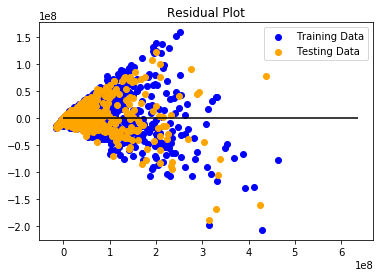

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
y_predicted = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets